In [408]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")

In [319]:
## import data and making header as 1
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

##  1. use head,describe.T,info,isnull.sum 

In [320]:
#fill NA value to o

df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [321]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [322]:
df.fillna(0)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [323]:
df=df.dropna(axis=0)

In [324]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [325]:
##1 use head,describe.T,info,isnull.sum 
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [326]:
df.describe().T

,count,unique,top,freq
day,244,32,1,8
month,244,5,8,62
year,244,2,2012,243
Temperature,244,20,35,29
RH,244,63,64,10
Ws,244,19,14,43
Rain,244,40,0,133
FFMC,244,174,88.9,7
DMC,244,166,7.9,5
DC,244,198,8,5


# check it is one dataset or having subdataset  if yes split the dataset into two 

In [327]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [328]:
df.loc[:122,'region']='Bajaia'
df.loc[122:,'region']='Sidi'

In [332]:
df=df.drop(122)

In [334]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)

In [336]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    float64
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    object 
dtypes: float64(8), int32(5), object(2)
memory usage: 25.5+ KB
None


### we cleaned the data and we handel missing value and format of the data

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    float64
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    object 
dtypes: float64(8), int32(5), object(2)
memory usage: 25.5+ KB


In [339]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

# remove unwanted Space from our Classes column

In [340]:
df['Classes']=[i.strip() for i in df['Classes']]
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

# mapping the 0,1 to our categorical variable

In [341]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bajaia
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,Bajaia
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bajaia
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,Bajaia
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,Bajaia


In [346]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

### Cleaning completed now we have to Exploreing the data

In [342]:
df['Classes']= df['Classes'].astype(int)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [343]:
df['Classes'].unique()

array([0, 1])

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    float64
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    int32  
 14  region       242 non-null    object 
dtypes: float64(8), int32(6), object(1)
memory usage: 24.6+ KB


## separtate the numerical and categorical columns

#  separte the numerical values from the dataset

In [360]:
numc=[i for i in df.columns if df[i].dtype != 'O' ]
numc

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [359]:
print('we have {} numerical features {}' .format(len(numc),'numc'))

we have 14 numerical features numc


#  separte the categorical values from the dataset

In [365]:
catc=[i for i in df.columns if df[i].dtype =='O']
catc

['region']

In [366]:
print('we have {} numerical features {}' .format(len(catc),'catc'))

we have 1 numerical features catc


 #  Feature Information

In [480]:
df.mean()

day              15.818182
month             7.508264
year           2012.000000
Temperature      32.161157
RH               61.995868
Ws               15.504132
Rain              0.749587
FFMC             77.933884
DMC              14.730165
DC               49.602893
ISI               4.759504
BUI              16.747521
FWI               7.063636
Classes           0.566116
dtype: float64

# graph to view the distribution of the each column using kde plot

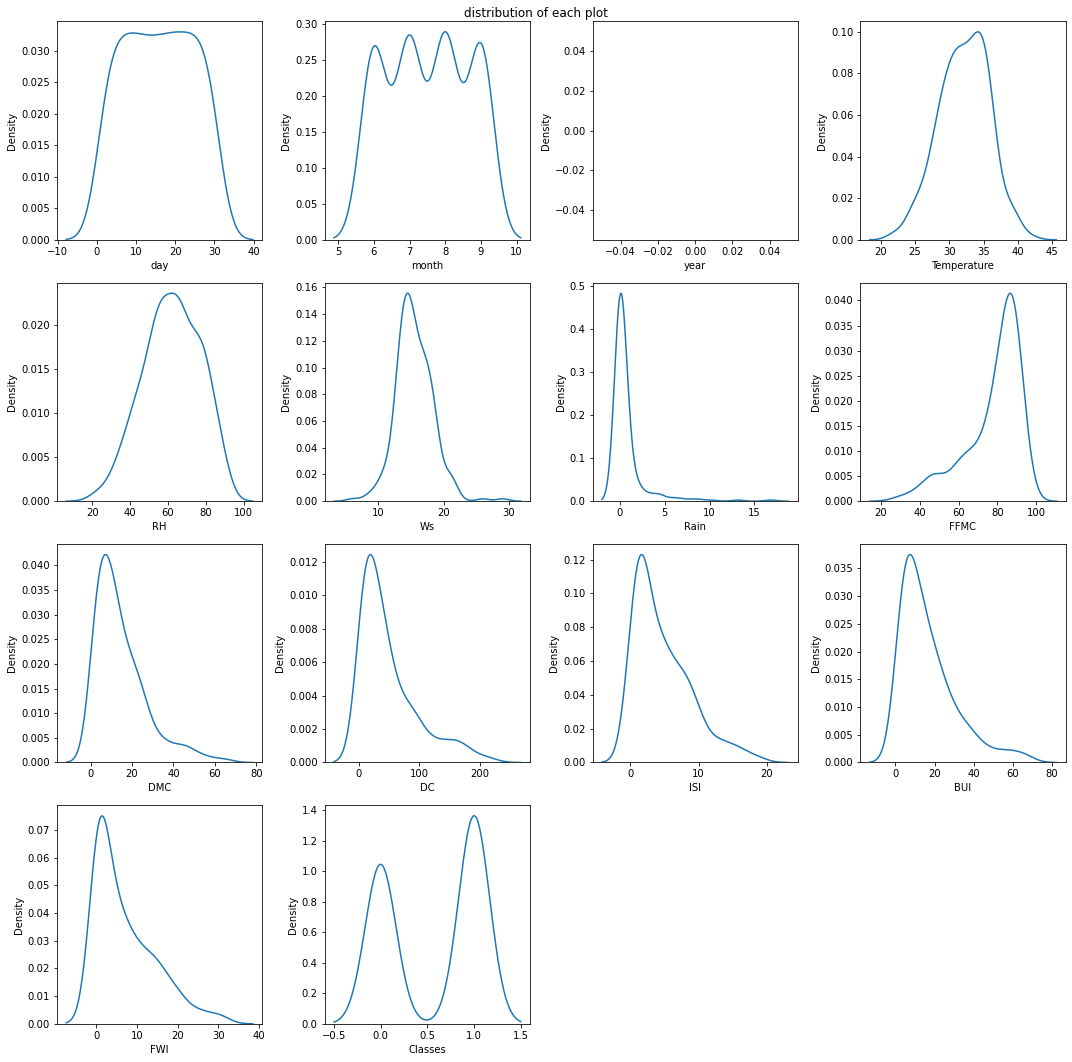

In [403]:
plt.figure(figsize=(15,15))
plt.suptitle('distribution of each plot')

for i in range (0,len(numc)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[numc[i]])
    plt.tight_layout()
    
    

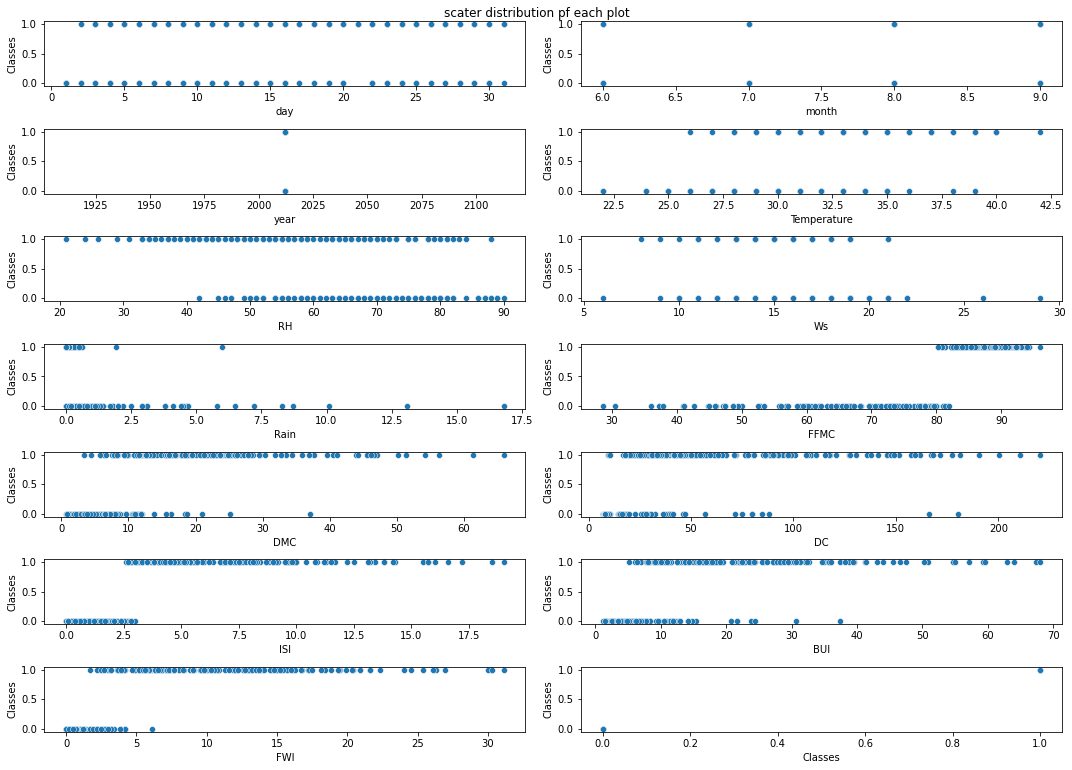

In [404]:
plt.figure(figsize=(15,15))
plt.suptitle('scater distribution pf each plot')

for i in range (0,len(numc)):
    plt.subplot(10,2,i+1)
    sns.scatterplot(df[numc[i]],df['Classes'])
    plt.tight_layout()

In [477]:
print("""\033[92m### Our observation over given Statestics

1. we can observe whenever the FWI is in above 5 Fire happens mostly
2. we can observe whenever the ISI is in range bellow 2.5 most of the time fire will not happen , and if its above 2.5  there is 100% of chance in Fire
3.we can observe whenever the FFMC is in range bellow 80 fire will not happen , and if its above 80  there is 100% of chance in Fire
4. we can obeserve that whenever the temperature is below 25 fire will not happen """)

### Our observation over given Statestics

1. we can observe whenever the FWI is in above 5 Fire happens mostly
2. we can observe whenever the ISI is in range bellow 2.5 most of the time fire will not happen , and if its above 2.5  there is 100% of chance in Fire
3.we can observe whenever the FFMC is in range bellow 80 fire will not happen , and if its above 80  there is 100% of chance in Fire
4. we can obeserve that whenever the temperature is below 25 fire will not happen 


#  Box Plot to identify the Outliers

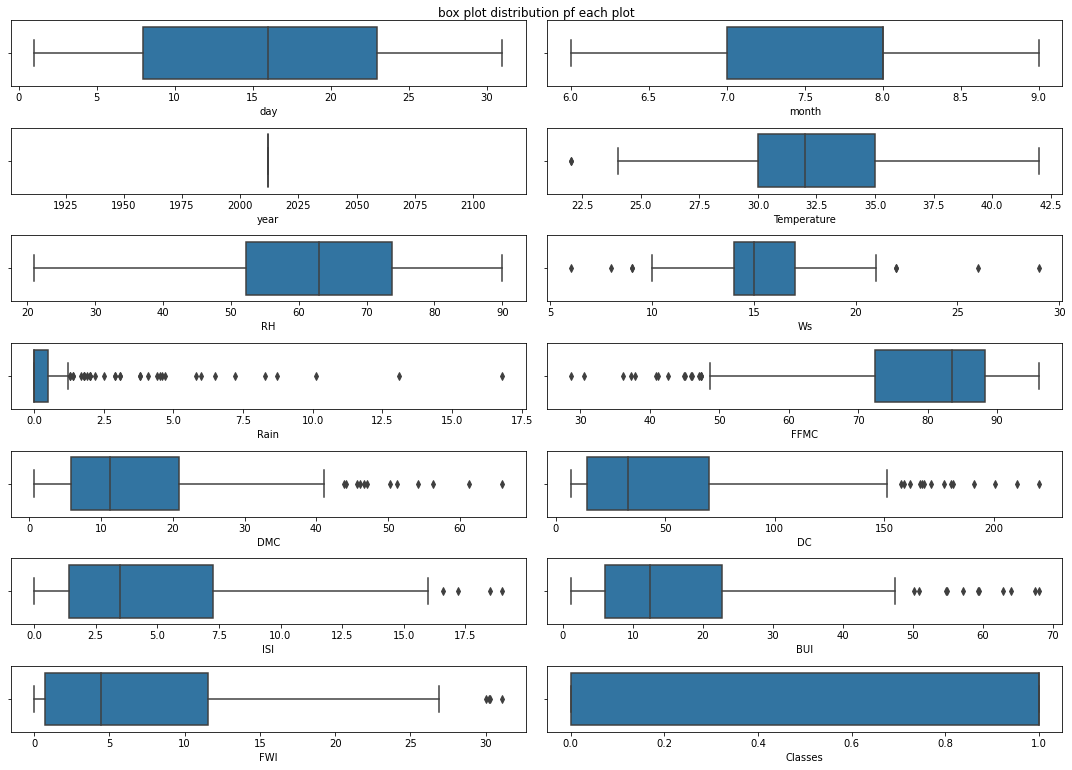

In [427]:
plt.figure(figsize=(15,15))
plt.suptitle('box plot distribution pf each plot')

for i in range (0,len(numc)):
    plt.subplot(10,2,i+1)
    sns.boxplot(df[numc[i]])
    plt.tight_layout()

# IQR to find iqr range

In [434]:
for j in range(0,len(numc)):
    Q1,Q3 =np.percentile(df[numc[j]],[25,75])
    IQR=Q3-Q1
    ul=Q3+1.5*IQR
    dl=Q1-1.5*IQR
    df[numc[j]]=[i for i in df[numc[j]] if [i>dl] and [i<ul]]
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bajaia
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,Bajaia
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bajaia
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,Bajaia
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,Bajaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi
238,27,9,2012,28,87,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,Sidi
239,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi
240,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi


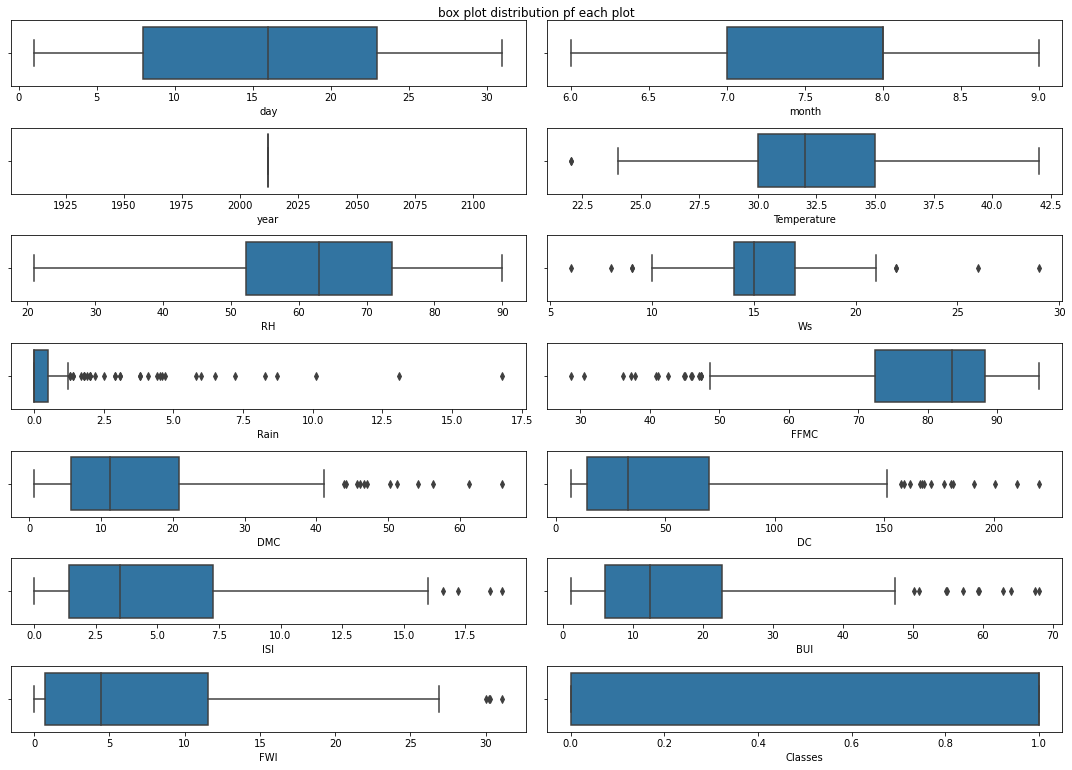

In [435]:
plt.figure(figsize=(15,15))
plt.suptitle('box plot distribution pf each plot')

for i in range (0,len(numc)):
    plt.subplot(10,2,i+1)
    sns.boxplot(df[numc[i]])
    plt.tight_layout()

In [444]:
crr=df.corr()
crr

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,-0.009150,NaN,0.093937,-0.071704,0.042366,-0.103166,0.217155,0.488677,0.525790,0.175347,0.514448,0.347203,0.197031
month,-0.009150,1.000000,NaN,-0.060370,-0.037303,-0.045082,0.044262,0.008477,0.062897,0.122283,0.060385,0.080112,0.077933,0.017776
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.093937,-0.060370,NaN,1.000000,-0.650794,-0.287372,-0.324513,0.676612,0.484601,0.375001,0.603101,0.458633,0.565813,0.514975
RH,-0.071704,-0.037303,NaN,-0.650794,1.000000,0.247453,0.218836,-0.644058,-0.406805,-0.224874,-0.685801,-0.351953,-0.579812,-0.430319
Ws,0.042366,-0.045082,NaN,-0.287372,0.247453,1.000000,0.178715,-0.173368,-0.004294,0.076165,0.004880,0.027971,0.029085,-0.074460
Rain,-0.103166,0.044262,NaN,-0.324513,0.218836,0.178715,1.000000,-0.539144,-0.284385,-0.294229,-0.343368,-0.295532,-0.320562,-0.374521
FFMC,0.217155,0.008477,NaN,0.676612,-0.644058,-0.173368,-0.539144,1.000000,0.601559,0.505102,0.738799,0.589872,0.689869,0.768076
DMC,0.488677,0.062897,NaN,0.484601,-0.406805,-0.004294,-0.284385,0.601559,1.000000,0.875504,0.679172,0.982179,0.875409,0.583798
DC,0.525790,0.122283,NaN,0.375001,-0.224874,0.076165,-0.294229,0.505102,0.875504,1.000000,0.506877,0.941802,0.738654,0.509178


<AxesSubplot:>

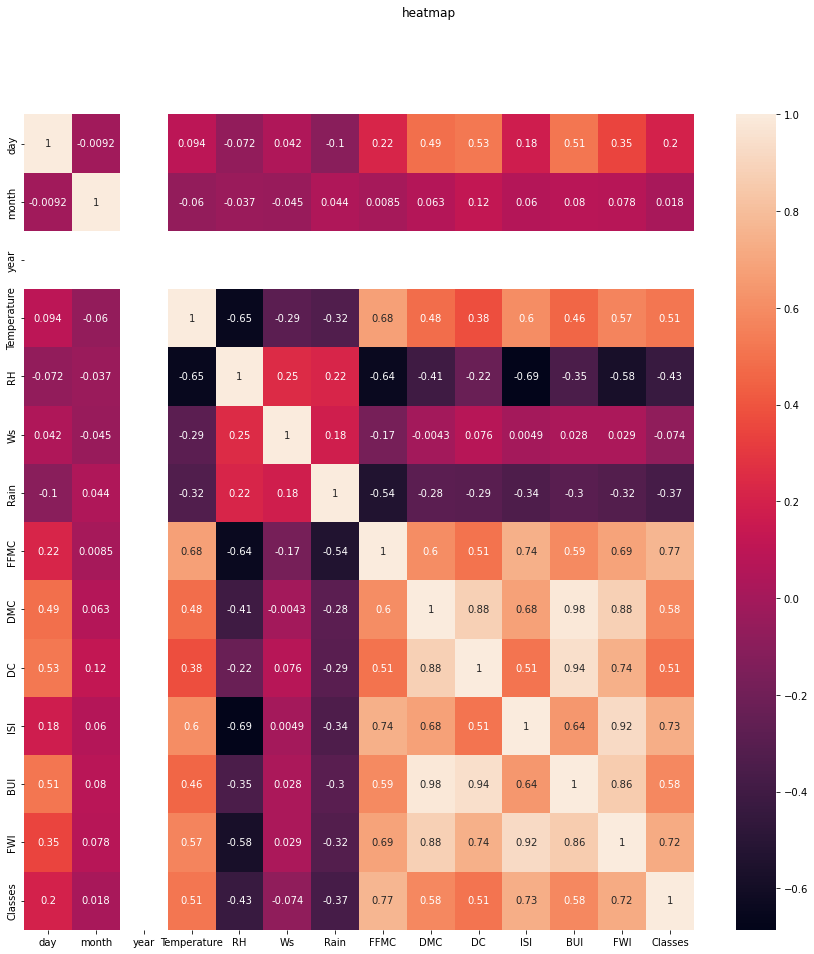

In [446]:
plt.figure(figsize=(15,15))
plt.suptitle('heatmap')
sns.heatmap(crr,annot=True)

In [478]:
print("""\033[92m # according Correlation above 70% related to forrest fire 
1. FWI
2.ISI
3.FFMC
# according Correlation above 50% related to forrest fire 
1.BUI
2.DC
3.DMC
4.Temperature""")

 # according Correlation above 70% related to forrest fire 
1. FWI
2.ISI
3.FFMC
# according Correlation above 50% related to forrest fire 
1.BUI
2.DC
3.DMC
4.Temperature


<AxesSubplot:xlabel='region', ylabel='Classes'>

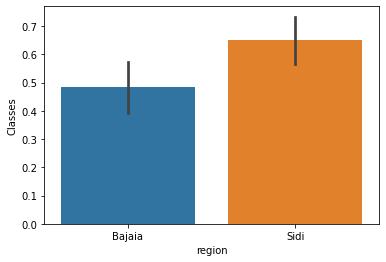

In [456]:
sns.barplot('region','Classes',data=df)

In [479]:
print('\033[92m 1. we can see that Sidi Area catches the Fire more than 20% of time than Bajaia)')

 1. we can see that Sidi Area catches the Fire more than 20% of time than Bajaia)
